# COVID-19 Analysis in Saudi Arabia (2020–2023)

This notebook analyzes COVID-19 trends in Saudi Arabia using a public health dataset from the [Our World in Data](https://ourworldindata.org/coronavirus) website. It focuses on:

- Total and new cases
- Deaths and case fatality rates (CFR)
- Vaccination progress
- Positive testing rates

Visualizations are included to track major changes across the pandemic timeline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading and Preprocessing Data

Load the dataset, convert the date column, and filter for Saudi Arabia up to December 2023.


In [2]:
df = pd.read_csv('covid_dataset.csv', header=1)

# Select relevant columns
df = df[['date', 'country', 'total_cases', 'new_cases', 'total_deaths', 'total_vaccinations', 'positive_rate']]

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df_saudi = df[df['country'] == 'Saudi Arabia'].loc[:'2023-12-31']
df_saudi = df_saudi.drop(columns = 'country')

df_saudi

,total_cases,new_cases,total_deaths,total_vaccinations,positive_rate
date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-04,0.0,0.0,0.0,NaN,NaN
2020-01-05,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...
2023-12-27,841469.0,0.0,9646.0,NaN,NaN
2023-12-28,841469.0,0.0,9646.0,NaN,NaN
2023-12-29,841469.0,0.0,9646.0,NaN,NaN


In [4]:
df_saudi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2020-01-01 to 2023-12-31
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_cases         1458 non-null   float64
 1   new_cases           1458 non-null   float64
 2   total_deaths        1458 non-null   float64
 3   total_vaccinations  370 non-null    float64
 4   positive_rate       842 non-null    float64
dtypes: float64(5)
memory usage: 68.5 KB


## Data Cleaning

- Fill missing values in the first three rows for cases and deaths with zero
- Fill missing values for vaccinations with zero before 6 January 2021 (vaccinations rollout date) and forward-fill vaccination data after this date (since the total vaccinations are cumulative)

Note: The `total_vaccinations` column contains a single unexpected value on 2023-04-25 after a long sequence of missing values. This data point was treated as an anomaly and replaced with NaN to avoid misleading analysis.


In [5]:
df_saudi[['total_cases', 'new_cases', 'total_deaths']] = df_saudi[['total_cases', 'new_cases', 'total_deaths']].fillna(0)

df_saudi.loc[:'2021-01-05', 'total_vaccinations'] = df_saudi.loc[:'2021-01-05', 'total_vaccinations'].fillna(0)
df_saudi.loc['2021-01-05':'2022-02-28', 'total_vaccinations'] = df_saudi.loc['2021-01-05':'2022-02-28',
                                                                             'total_vaccinations'].ffill()
df_saudi.loc['2023-04-25', 'total_vaccinations'] = np.nan

## Descriptive Statistics & Correlations

Display summary statistics for each variable and examine how strongly they correlate with the COVID-19 positive rate.

In [6]:
df_saudi.describe()

,total_cases,new_cases,total_deaths,total_vaccinations,positive_rate
count,1461.000000,1461.000000,1461.000000,7.900000e+02,842.000000
mean,564722.329911,575.954141,7219.716632,1.476505e+07,2.283268
std,278447.917652,971.879455,3165.536971,2.037145e+07,3.415335
min,0.000000,0.000000,0.000000,0.000000e+00,0.065637
25%,362601.000000,35.000000,6214.000000,0.000000e+00,0.597649
50%,555417.000000,157.000000,8875.000000,4.161305e+05,1.073232
75%,826984.000000,677.000000,9515.000000,3.188789e+07,2.119987
max,841469.000000,5928.000000,9646.000000,6.095397e+07,17.702328


In [7]:
df_saudi.corr()['positive_rate'].sort_values(ascending=False).to_frame()

,positive_rate
positive_rate,1.000000
new_cases,0.627688
total_vaccinations,-0.294897
total_cases,-0.497673
total_deaths,-0.640228


## Annual Trends

- **Cumulative cases by year**: Total cases as of end of each year
- **Total cases per year**: Sum of new cases for each year
- **Average positive rate per year**: Mean of daily positive rate within each year

_Note: The average positive rate for 2023 is NaN due to missing data in that year._


In [50]:
cumulative_cases_by_year = df_saudi['total_cases'].resample('Y').last().to_frame().astype(int)
cumulative_cases_by_year

,total_cases
date,
2020-12-31,362601
2021-12-31,555417
2022-12-31,826984
2023-12-31,841469


In [51]:
total_cases_per_year = df_saudi['new_cases'].resample('Y').sum().to_frame().astype(int)
total_cases_per_year

,new_cases
date,
2020-12-31,362601
2021-12-31,192816
2022-12-31,271567
2023-12-31,14485


In [55]:
avg_annual_positive_rate = df_saudi['positive_rate'].resample('Y').mean().to_frame()
avg_annual_positive_rate

,positive_rate
date,
2020-12-31,4.479653
2021-12-31,0.738397
2022-12-31,1.776871
2023-12-31,NaN


## Final COVID-19 Numbers at End of 2023

Display the final cumulative number of:
- Total confirmed COVID-19 cases
- Total reported deaths


In [56]:
final_cases_count = df_saudi['total_cases'].max()
final_deaths_count = df_saudi['total_deaths'].max()
print(f'Total COVID-19 cases at the end of 2023: {final_cases_count:.0f}')
print(f'Total COVID-19 related deaths at the end of 2023: {final_deaths_count:.0f}')

Total COVID-19 cases at the end of 2023: 841469
Total COVID-19 related deaths at the end of 2023: 9646


## Derive New Daily Metrics

- Compute `new_deaths` and `new_vaccinations` using `.diff()`
- Useful for calculating per-year and per-month summaries


In [57]:
df_saudi['new_deaths'] = df_saudi['total_deaths'].diff()
df_saudi['new_vaccinations'] = df_saudi['total_vaccinations'].diff()

In [58]:
total_deaths_per_year = df_saudi['new_deaths'].resample('Y').sum().to_frame().astype(int)
total_deaths_per_year

,new_deaths
date,
2020-12-31,6214
2021-12-31,2661
2022-12-31,640
2023-12-31,131


## Annual Case Fatality Rate (CFR)

Compute yearly death-to-case ratios to observe how fatality changed over time.

In [59]:
# Multiply by 100 to convert to percentage
case_fatality_rate = (total_deaths_per_year['new_deaths'] / total_cases_per_year['new_cases']) * 100
case_fatality_rate = case_fatality_rate.to_frame(name='case_fatality_rate')
case_fatality_rate

,case_fatality_rate
date,
2020-12-31,1.713729
2021-12-31,1.380072
2022-12-31,0.235669
2023-12-31,0.904384


## Monthly Trends

Prepare data for monthly:
- Total cases
- Total deaths
- Cumulative vaccinations
- Average positive rate
- CFR

Used for detailed visual tracking of the pandemic timeline.


In [41]:
total_cases_per_month = df_saudi['new_cases'].resample('M').sum()
total_deaths_per_month = df_saudi['new_deaths'].resample('M').sum()

# The selected dates are for valid data
cumulative_vaccinations_by_month = df_saudi['total_vaccinations'].resample('M').last().loc['2021-01-31':'2022-02-28']
avg_monthly_positive_rate = df_saudi['positive_rate'].resample('M').mean().loc['2020-03-31':'2022-06-30']

monthly_cfr = (total_deaths_per_month/total_cases_per_month)*100

## Plot 1: Total Monthly COVID-19 Cases

Shows monthly confirmed case counts with important milestone lines:
- Vaccine rollout in Jan 2021
- First Omicron variant case in Dec 2021


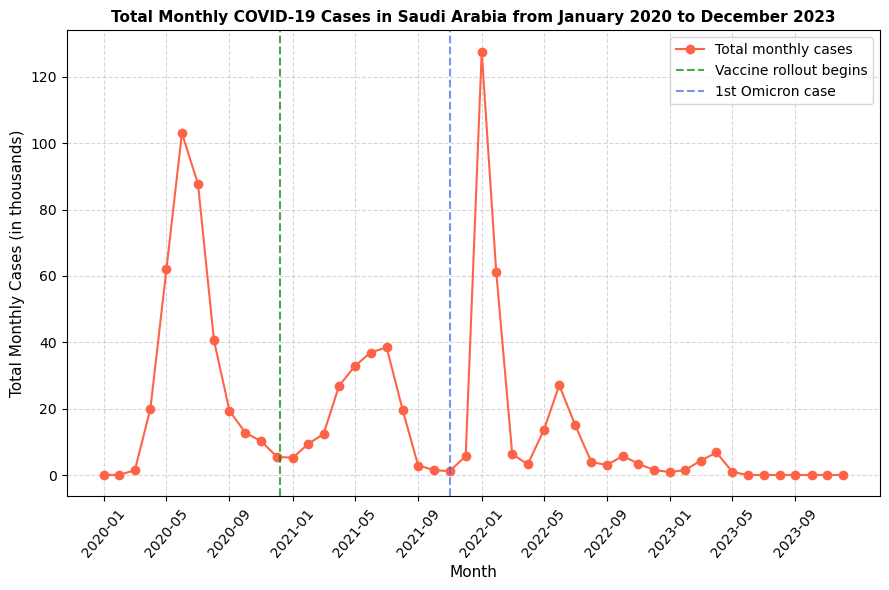

In [42]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(total_cases_per_month.index,
        total_cases_per_month/1e3,
        marker='o', label='Total monthly cases', color='tomato')

ax.set_title('Total Monthly COVID-19 Cases in Saudi Arabia from January 2020 to December 2023',
             fontsize=11, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Monthly Cases (in thousands)', fontsize=11)

ax.set_xticks(total_cases_per_month.index[::4])
ax.set_xticklabels([d.strftime('%Y-%m') for d in total_cases_per_month.index[::4]],
                   rotation=50)

vaccine_rollout_date = pd.to_datetime('2021-01-06')
vaccine_line = ax.axvline(
    x=vaccine_rollout_date,
    color='green',
    linestyle='--',
    linewidth=1.5,
    alpha=0.7,
    label='Vaccine rollout begins'
)

omicron_date = pd.to_datetime('2021-12-01')
vaccine_line = ax.axvline(
    x=omicron_date,
    color='royalblue',
    linestyle='--',
    linewidth=1.5,
    alpha=0.7,
    label='1st Omicron case'
)

ax.legend(loc='upper right')

ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Plot 2: Average Monthly Positive Rate

Tracks the percentage of positive COVID-19 tests each month to gauge test positivity trends.


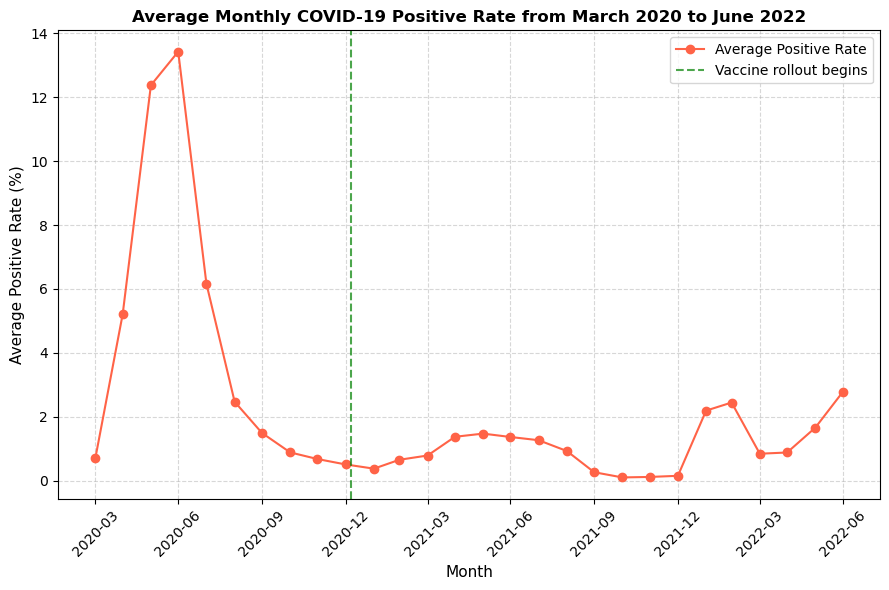

In [29]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(avg_monthly_positive_rate.index,
        avg_monthly_positive_rate,
        label='Average Positive Rate',
        marker='o', color='tomato')

ax.set_title('Average Monthly COVID-19 Positive Rate from March 2020 to June 2022',
             fontsize=12, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Average Positive Rate (%)', fontsize=11)

ax.set_xticks(avg_monthly_positive_rate.index[::3])
ax.set_xticklabels([d.strftime('%Y-%m') for d in avg_monthly_positive_rate.index[::3]],
                   rotation=45)

vaccine_rollout_date = pd.to_datetime('2021-01-06')
vaccine_line = ax.axvline(
    x=vaccine_rollout_date,
    color='green',
    linestyle='--',
    linewidth=1.5,
    alpha=0.7,
    label='Vaccine rollout begins'
)
ax.legend(loc='upper right')

ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Plot 3: Monthly Case Fatality Rate (CFR)

Illustrates the fatality rate over time, with vaccine rollout marked to assess any impact.


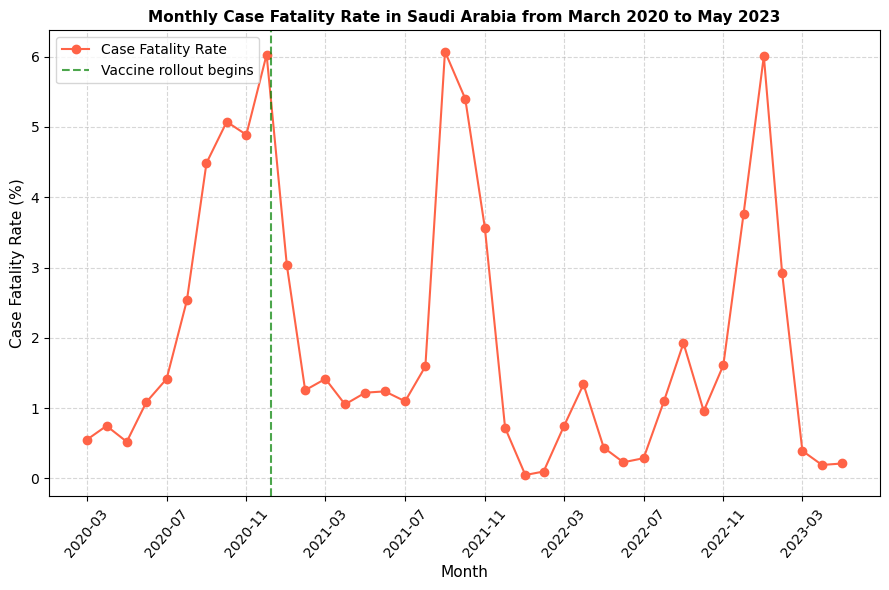

In [30]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(monthly_cfr.loc['2020-03-31':'2023-05-31'].index,
        monthly_cfr.loc['2020-03-31':'2023-05-31'],
        marker='o', label='Case Fatality Rate', color='tomato')

ax.set_title('Monthly Case Fatality Rate in Saudi Arabia from March 2020 to May 2023',
             fontsize=11, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Case Fatality Rate (%)', fontsize=11)

ax.set_xticks(monthly_cfr.loc['2020-03-31':'2023-05-31'].index[::4])
ax.set_xticklabels([d.strftime('%Y-%m') for d in monthly_cfr.loc['2020-03-31':'2023-05-31'].index[::4]],
                   rotation=50)

vaccine_rollout_date = pd.to_datetime('2021-01-06')
vaccine_line = ax.axvline(
    x=vaccine_rollout_date,
    color='green',
    linestyle='--',
    linewidth=1.5,
    alpha=0.7,
    label='Vaccine rollout begins'
)

ax.legend(loc='best')

ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Plot 4: Cumulative Vaccinations vs. Positive Rate

Overlay plot showing:
- Positive rate trend (left y-axis)
- Cumulative vaccinations (right y-axis)

Helps visualize the relationship between vaccination progress and test positivity trends.


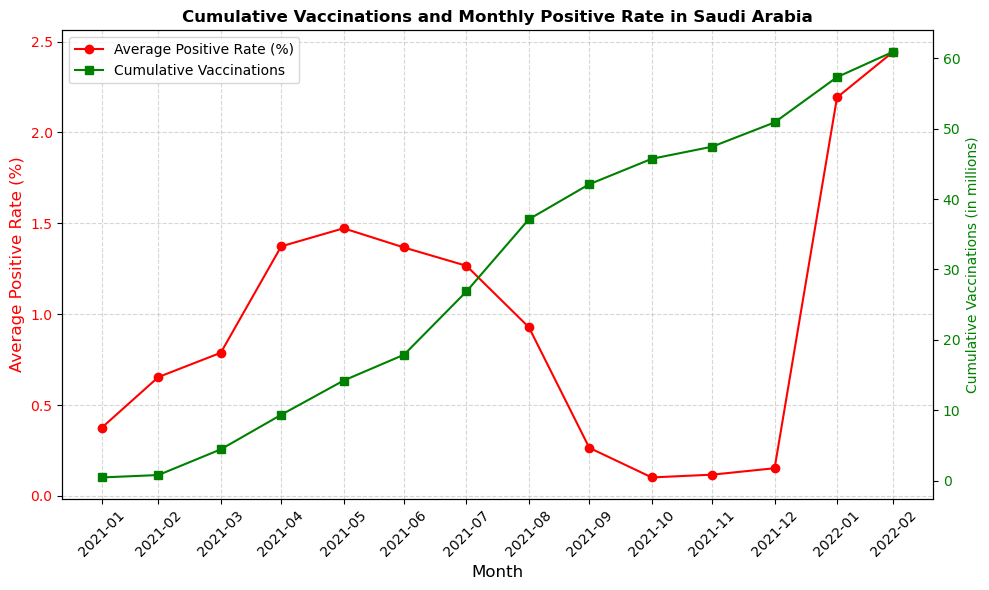

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(
    avg_monthly_positive_rate.loc['2021-01-31':'2022-02-28'].index,
    avg_monthly_positive_rate.loc['2021-01-31':'2022-02-28'],
    color='red', marker='o', label='Average Positive Rate (%)'
)

ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Average Positive Rate (%)', color='red', fontsize=12)
ax1.set_xticks(cumulative_vaccinations_by_month.index)
ax1.set_xticklabels([d.strftime('%Y-%m') for d in cumulative_vaccinations_by_month.index],
                    rotation=45)
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
line2, = ax2.plot(
    cumulative_vaccinations_by_month.index,
    cumulative_vaccinations_by_month / 1e6,
    color='green', marker='s', label='Cumulative Vaccinations'
)

ax2.set_ylabel('Cumulative Vaccinations (in millions)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax1.set_title('Cumulative Vaccinations and Monthly Positive Rate in Saudi Arabia',
              fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.5)

lines = [line1, line2]
labels = [line1.get_label(), line2.get_label()]
ax1.legend(lines, labels, loc='upper left')

fig.tight_layout()
plt.show()